# Python Lab Exercise #2

## Objectives:

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we are using **pd.read_sql()** method for importing the table from a db file.

Read about this dataset [here](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data).

In [86]:

heartDF = pd.read_csv("heart_disease_uci.csv")
con = sqlite3.connect("python.db")
heart_df = pd.read_sql("SELECT * FROM heart", con)
heart_df.head()



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0


The output of the `.to_sql()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [87]:
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [88]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [89]:
heart_df.index

RangeIndex(start=0, stop=920, step=1)

In [90]:
age_series.index

RangeIndex(start=0, stop=920, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [91]:
heart_df.values

array([[1, 63, 'Male', ..., 0.0, 'fixed defect', 0],
       [2, 67, 'Male', ..., 3.0, 'normal', 2],
       [3, 67, 'Male', ..., 2.0, 'reversable defect', 1],
       ...,
       [918, 55, 'Male', ..., nan, 'fixed defect', 2],
       [919, 58, 'Male', ..., nan, None, 0],
       [920, 62, 'Male', ..., nan, None, 1]], dtype=object)

## Basic DataFrame Attributes and Methods

### `.head()`

In [92]:
# complete the python code here
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0


### `.tail()`

In [93]:
# complete the python code here
heart_df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,1.0,st-t abnormality,154.0,0.0,0.0,None,NaN,None,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,0.0,st-t abnormality,NaN,NaN,NaN,None,NaN,None,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,1.0,st-t abnormality,100.0,0.0,0.0,None,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,1.0,lv hypertrophy,NaN,NaN,NaN,None,NaN,None,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,0.0,lv hypertrophy,93.0,1.0,0.0,None,NaN,None,1


### `.info()`

In [94]:
# complete the python code here
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    float64
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    float64
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 115.1+ KB


### `.describe()`

In [95]:
# complete the python code here
heart_df.describe()

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,830.000000,865.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,0.166265,137.545665,0.389595,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,0.372543,25.926276,0.487941,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,0.000000,157.000000,1.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### `.dtypes`

In [96]:
# complete the python code here
heart_df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs         float64
restecg      object
thalch      float64
exang       float64
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

### `.shape`

In [97]:
# complete the python code here
heart_df.shape

(920, 16)

### Exploratory Plots

Let's make ourselves a histogram of ages:

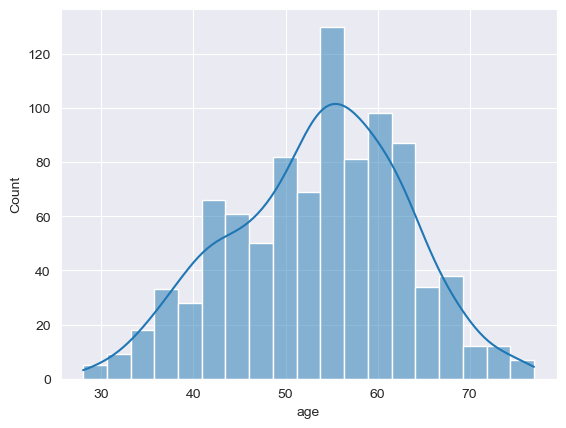

In [98]:
sns.set_style('darkgrid')
sns.histplot(data=heart_df['age'], kde=True);


# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

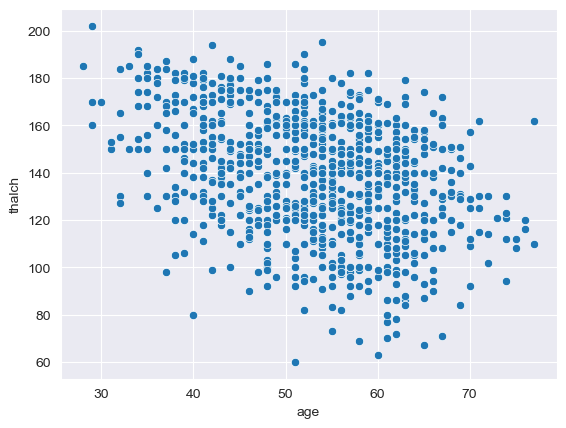

In [99]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalch']);

## Adding to a DataFrame

### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [100]:
extra_rows = {'age': [40, 30], 
              'sex': [1, 0], 
              'cp': [0, 0], 
              'trestbps': [120, 130],
              'chol': [240, 200],
              'fbs': [0, 0], 
              'restecg': [1, 0], 
              'thalach': [120, 122], 
              'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 
              'slope': [1, 1], 
              'ca': [0, 1], 
              'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [101]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.


missing = pd.DataFrame.from_dict(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [102]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.
# complete the python code here

# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

heart_df = pd.concat([heart_df, missing], ignore_index=True)



In [103]:
# Let's check the end to make sure we were successful!
# complete the python code here

heart_df.tail()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thalach,target
917,918.0,55,Male,VA Long Beach,asymptomatic,122.0,223.0,1.0,st-t abnormality,100.0,0.0,0.0,None,NaN,fixed defect,2.0,NaN,NaN
918,919.0,58,Male,VA Long Beach,asymptomatic,NaN,385.0,1.0,lv hypertrophy,NaN,NaN,NaN,None,NaN,None,0.0,NaN,NaN
919,920.0,62,Male,VA Long Beach,atypical angina,120.0,254.0,0.0,lv hypertrophy,93.0,1.0,0.0,None,NaN,None,1.0,NaN,NaN
920,NaN,40,1,NaN,0,120.0,240.0,0.0,1,NaN,0.0,0.1,1,0.0,2,NaN,120.0,0.0
921,NaN,30,0,NaN,0,130.0,200.0,0.0,0,NaN,1.0,1.0,1,1.0,3,NaN,122.0,0.0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [104]:

heart_df['test'] = 0

In [105]:
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thalach,target,test
0,1.0,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0.0,NaN,NaN,0
1,2.0,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2.0,NaN,NaN,0
2,3.0,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1.0,NaN,NaN,0
3,4.0,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0.0,NaN,NaN,0
4,5.0,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0.0,NaN,NaN,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [106]:
# complete the python code here
heart_df["chol_plus_trestbps"] = heart_df["chol"] + heart_df["trestbps"]


In [107]:
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thalach,target,test,chol_plus_trestbps
0,1.0,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0.0,NaN,NaN,0,378.0
1,2.0,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2.0,NaN,NaN,0,446.0
2,3.0,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1.0,NaN,NaN,0,349.0
3,4.0,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0.0,NaN,NaN,0,380.0
4,5.0,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0.0,NaN,NaN,0,334.0


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [108]:
heart_df['age'] >= 70

0      False
1      False
2      False
3      False
4      False
       ...  
917    False
918    False
919    False
920    False
921    False
Name: age, Length: 922, dtype: bool

In [109]:
heart_df[heart_df['age'] >= 70]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thalach,target,test,chol_plus_trestbps
42,43.0,71,Female,Cleveland,atypical angina,160.0,302.0,0.0,normal,162.0,0.0,0.4,upsloping,2.0,normal,0.0,NaN,NaN,0,462.0
103,104.0,71,Female,Cleveland,non-anginal,110.0,265.0,1.0,lv hypertrophy,130.0,0.0,0.0,upsloping,1.0,normal,0.0,NaN,NaN,0,375.0
136,137.0,70,Male,Cleveland,asymptomatic,145.0,174.0,0.0,normal,125.0,1.0,2.6,downsloping,0.0,reversable defect,4.0,NaN,NaN,0,319.0
155,156.0,70,Male,Cleveland,asymptomatic,130.0,322.0,0.0,lv hypertrophy,109.0,0.0,2.4,flat,3.0,normal,1.0,NaN,NaN,0,452.0
161,162.0,77,Male,Cleveland,asymptomatic,125.0,304.0,0.0,lv hypertrophy,162.0,1.0,0.0,upsloping,3.0,normal,4.0,NaN,NaN,0,429.0
170,171.0,70,Male,Cleveland,non-anginal,160.0,269.0,0.0,normal,112.0,1.0,2.9,flat,1.0,reversable defect,3.0,NaN,NaN,0,429.0
233,234.0,74,Female,Cleveland,atypical angina,120.0,269.0,0.0,lv hypertrophy,121.0,1.0,0.2,upsloping,1.0,normal,0.0,NaN,NaN,0,389.0
257,258.0,76,Female,Cleveland,non-anginal,140.0,197.0,0.0,st-t abnormality,116.0,0.0,1.1,flat,0.0,normal,0.0,NaN,NaN,0,337.0
258,259.0,70,Male,Cleveland,atypical angina,156.0,245.0,0.0,lv hypertrophy,143.0,0.0,0.0,upsloping,0.0,normal,0.0,NaN,NaN,0,401.0
273,274.0,71,Female,Cleveland,asymptomatic,112.0,149.0,0.0,normal,125.0,0.0,1.6,flat,0.0,normal,0.0,NaN,NaN,0,261.0


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

In [110]:
# complete the python code here

old_or_high_bp = heart_df[(heart_df["age"] >= 70) | (heart_df["trestbps"] > 170)]


old_or_high_bp



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thalach,target,test,chol_plus_trestbps
14,15.0,52,Male,Cleveland,non-anginal,172.0,199.0,1.0,normal,162.0,0.0,0.5,upsloping,0.0,reversable defect,0.0,NaN,NaN,0,371.0
42,43.0,71,Female,Cleveland,atypical angina,160.0,302.0,0.0,normal,162.0,0.0,0.4,upsloping,2.0,normal,0.0,NaN,NaN,0,462.0
83,84.0,68,Male,Cleveland,non-anginal,180.0,274.0,1.0,lv hypertrophy,150.0,1.0,1.6,flat,0.0,reversable defect,3.0,NaN,NaN,0,454.0
103,104.0,71,Female,Cleveland,non-anginal,110.0,265.0,1.0,lv hypertrophy,130.0,0.0,0.0,upsloping,1.0,normal,0.0,NaN,NaN,0,375.0
126,127.0,56,Female,Cleveland,asymptomatic,200.0,288.0,1.0,lv hypertrophy,133.0,1.0,4.0,downsloping,2.0,reversable defect,3.0,NaN,NaN,0,488.0
136,137.0,70,Male,Cleveland,asymptomatic,145.0,174.0,0.0,normal,125.0,1.0,2.6,downsloping,0.0,reversable defect,4.0,NaN,NaN,0,319.0
155,156.0,70,Male,Cleveland,asymptomatic,130.0,322.0,0.0,lv hypertrophy,109.0,0.0,2.4,flat,3.0,normal,1.0,NaN,NaN,0,452.0
161,162.0,77,Male,Cleveland,asymptomatic,125.0,304.0,0.0,lv hypertrophy,162.0,1.0,0.0,upsloping,3.0,normal,4.0,NaN,NaN,0,429.0
170,171.0,70,Male,Cleveland,non-anginal,160.0,269.0,0.0,normal,112.0,1.0,2.9,flat,1.0,reversable defect,3.0,NaN,NaN,0,429.0
172,173.0,59,Female,Cleveland,asymptomatic,174.0,249.0,0.0,normal,143.0,1.0,0.0,flat,0.0,normal,1.0,NaN,NaN,0,423.0


### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

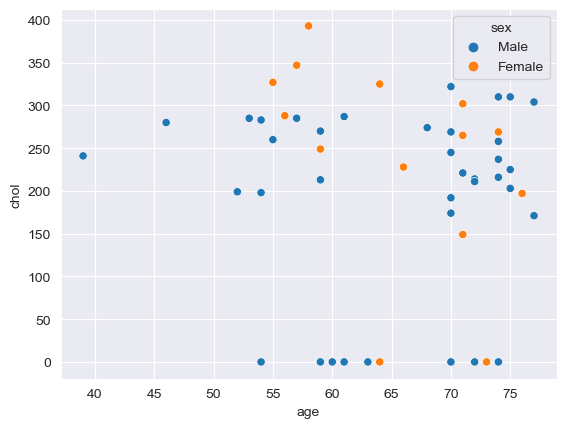

In [111]:
# complete the python code here
at_risk = heart_df[(heart_df["age"] >= 70) | (heart_df["trestbps"] > 170)]

sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [112]:
heart_df.loc

In [113]:
heart_df.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145.0
1,67,160.0
2,67,120.0
3,37,130.0
4,41,130.0
5,56,120.0
6,62,140.0
7,57,120.0
8,63,130.0
9,53,140.0


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [114]:
heart_df.iloc

In [115]:
heart_df.iloc[3, 0]

4.0

In [116]:
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thalach,target,test,chol_plus_trestbps
0,1.0,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0.0,NaN,NaN,0,378.0
1,2.0,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2.0,NaN,NaN,0,446.0
2,3.0,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1.0,NaN,NaN,0,349.0
3,4.0,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0.0,NaN,NaN,0,380.0
4,5.0,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0.0,NaN,NaN,0,334.0


### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [117]:
# complete the python code here
heart_df.iloc[:10, [heart_df.columns.get_loc('age'), heart_df.columns.get_loc('trestbps')]]



,age,trestbps
0,63,145.0
1,67,160.0
2,67,120.0
3,37,130.0
4,41,130.0
5,56,120.0
6,62,140.0
7,57,120.0
8,63,130.0
9,53,140.0


## Statistics

### `.mean()`

In [118]:
# complete the python code here

heart_df.mean(numeric_only=True)


id                    460.500000
age                    53.470716
trestbps              132.115875
chol                  199.177130
fbs                     0.165865
thalch                137.545665
exang                   0.389850
oldpeak                 0.878023
ca                      0.675241
num                     0.995652
thalach               121.000000
target                  0.000000
test                    0.000000
chol_plus_trestbps    332.154306
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [119]:
# complete the python code here
heart_df.min(numeric_only=True)



id                      1.0
age                    28.0
trestbps                0.0
chol                    0.0
fbs                     0.0
thalch                 60.0
exang                   0.0
oldpeak                -2.6
ca                      0.0
num                     0.0
thalach               120.0
target                  0.0
test                    0.0
chol_plus_trestbps      0.0
dtype: float64

### `.max()`

In [120]:
# complete the python code here

heart_df.max(numeric_only=True)


id                    920.0
age                    77.0
trestbps              200.0
chol                  603.0
fbs                     1.0
thalch                202.0
exang                   1.0
oldpeak                 6.2
ca                      3.0
num                     4.0
thalach               122.0
target                  0.0
test                    0.0
chol_plus_trestbps    733.0
dtype: float64

## Series Methods

### `.value_counts()`

How many different values does slope have? What about sex? And target?

In [121]:
heart_df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
1                2
Name: count, dtype: int64

In [122]:
heart_df['sex'].value_counts()


sex
Male      726
Female    194
1           1
0           1
Name: count, dtype: int64

### `.sort_values()`

In [123]:
heart_df['age'].sort_values()

303    28
304    29
132    29
305    29
306    30
       ..
860    75
257    76
845    76
161    77
751    77
Name: age, Length: 922, dtype: int64

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

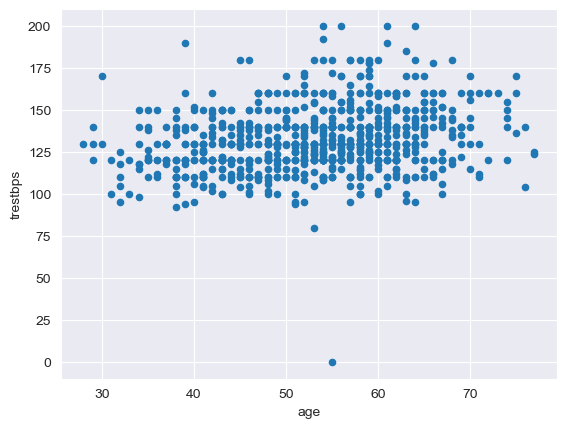

In [124]:
heart_df.plot(x='age', y='trestbps', kind='scatter');

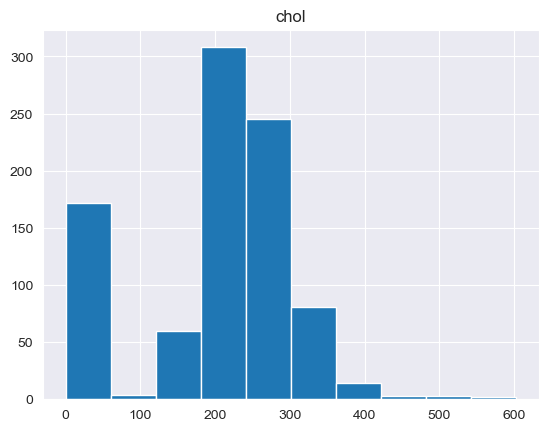

In [125]:
heart_df.hist(column='chol');

### Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

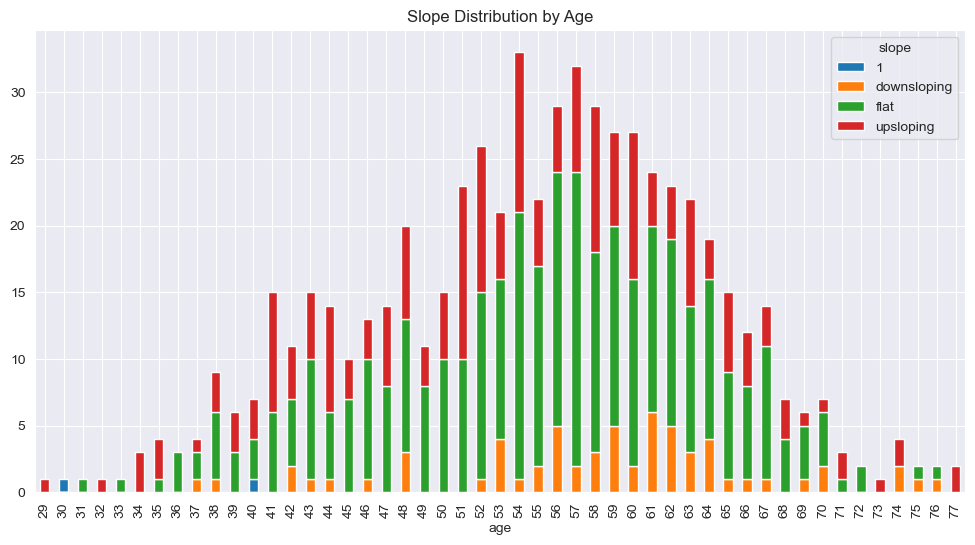

In [126]:
# complete the python code here


age_slope_counts = heart_df.groupby(["age", "slope"]).size().unstack(fill_value=0)


age_slope_counts.plot(kind='bar', stacked=True, figsize=(12,6), title="Slope Distribution by Age");




2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

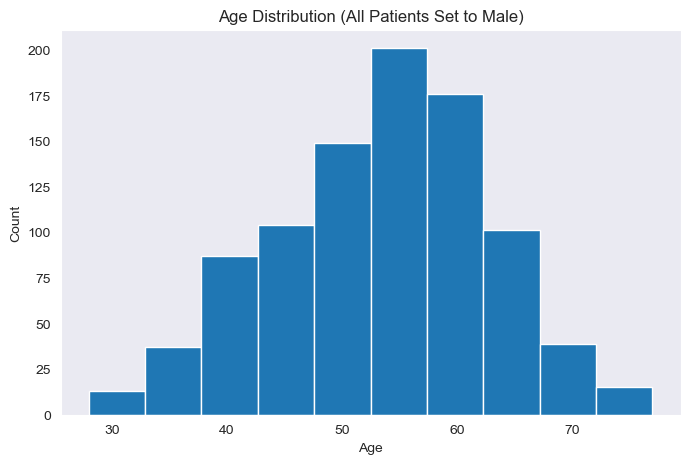

In [127]:
# complete the python code here


heart_augmented = heart_df.copy()
heart_augmented['sex'] = 1


heart_augmented['age'].hist(bins=10, figsize=(8, 5))


plt.title("Age Distribution (All Patients Set to Male)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(False)




3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

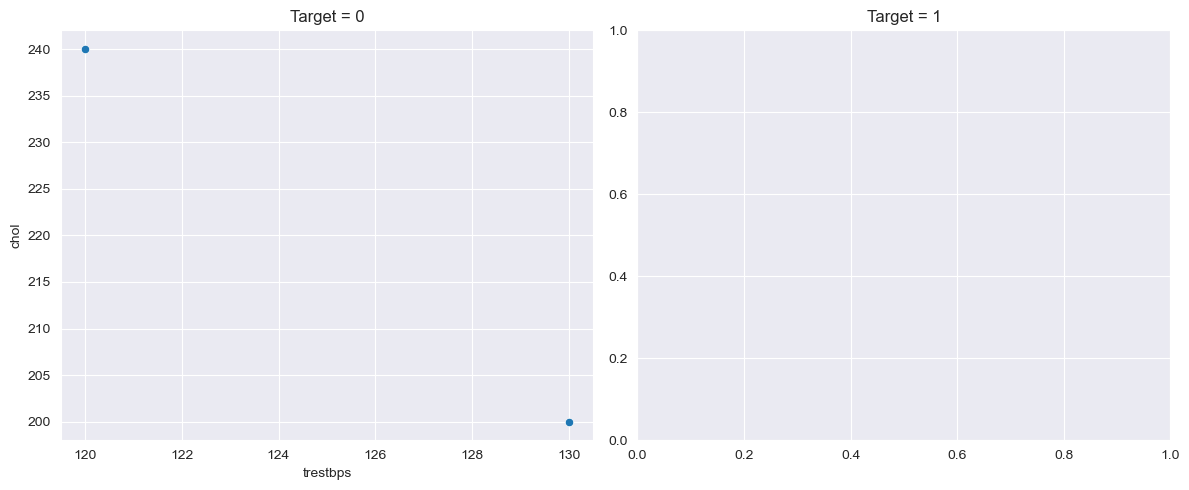

In [129]:
# complete the python code here


no_disease = heart_df[heart_df['target'] == 0]
has_disease = heart_df[heart_df['target'] == 1]


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=no_disease['trestbps'], y=no_disease['chol'])
plt.title("Target = 0")


plt.subplot(1, 2, 2)
sns.scatterplot(x=has_disease['trestbps'], y=has_disease['chol'])
plt.title("Target = 1")

plt.tight_layout()
plt.show()




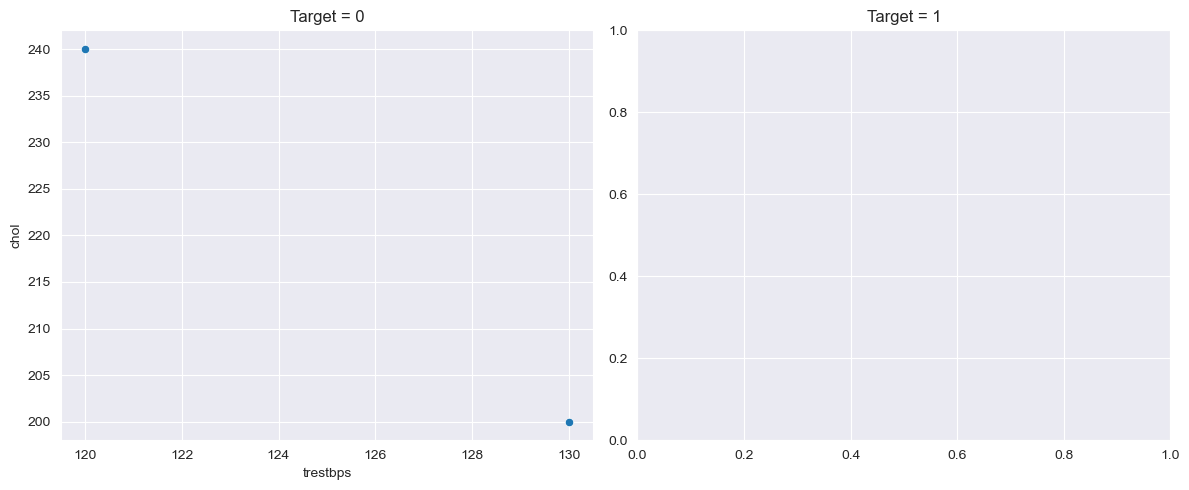